In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
import seaborn as sns
import ELOTools as et
import ELOVisuals as ev

In [2]:
map_results = pd.read_csv('Match Summary Data.csv', index_col=0)

In [3]:
map_results[(map_results['Team A'] == "HOU") | (map_results['Team B'] == "HOU")].head(100)

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-03-03,Volskaya Industries,1,Assault,2471,HOU,NYE,Team B
1,2018-03-03,Lijiang Tower,2,KOTH,2471,HOU,NYE,Team B
2,2018-03-03,King's Row,3,Hybrid,2471,HOU,NYE,Team B
3,2018-03-03,Route 66,4,Escort,2471,HOU,NYE,Team B
0,2018-03-02,Volskaya Industries,1,Assault,2465,HOU,PHI,Team A
1,2018-03-02,Nepal,2,KOTH,2465,HOU,PHI,Team A
2,2018-03-02,Hollywood,3,Hybrid,2465,HOU,PHI,Team B
3,2018-03-02,Route 66,4,Escort,2465,HOU,PHI,Team B
4,2018-03-02,Ilios,5,KOTH,2465,HOU,PHI,Team B
0,2018-02-24,Hanamura,1,Assault,2459,BOS,HOU,Team B


In [4]:
main_df = map_results.copy()
main_df['Match of the Day'] = map_results.copy()['Map Number']
main_df.head()

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner,Match of the Day
0,2018-03-04,Hanamura,1,Assault,2472,SHD,SFS,Team B,1
1,2018-03-04,Nepal,2,KOTH,2472,SHD,SFS,Team B,2
2,2018-03-04,King's Row,3,Hybrid,2472,SHD,SFS,Team B,3
3,2018-03-04,Watchpoint: Gibraltar,4,Escort,2472,SHD,SFS,Team B,4
0,2018-03-03,Volskaya Industries,1,Assault,2471,HOU,NYE,Team B,1


In [42]:
elo_df = et.compute_elo_table(main_df, K=100)

In [43]:
elo_df.head()

,Date,Elo,Match Number,Team
0,2018-01-10,1000.0,0,LDN
1,2018-01-10,1000.0,0,FLA
2,2018-01-10,1000.0,0,HOU
3,2018-01-10,1000.0,0,VAL
4,2018-01-10,1000.0,0,BOS


In [44]:
team_a_list = set(map_results["Team A"].unique())
team_b_list = set(map_results["Team B"].unique())
team_list = list(team_a_list.union(team_b_list))
team_list

['LDN',
 'FLA',
 'HOU',
 'VAL',
 'BOS',
 'PHI',
 'DAL',
 'SEO',
 'SHD',
 'SFS',
 'GLA',
 'NYE']

In [45]:
team_elo_dfs = {}
for team in team_list:
    temp_elo_df = elo_df[elo_df["Team"]==team]
    team_elo_dfs[team] = temp_elo_df

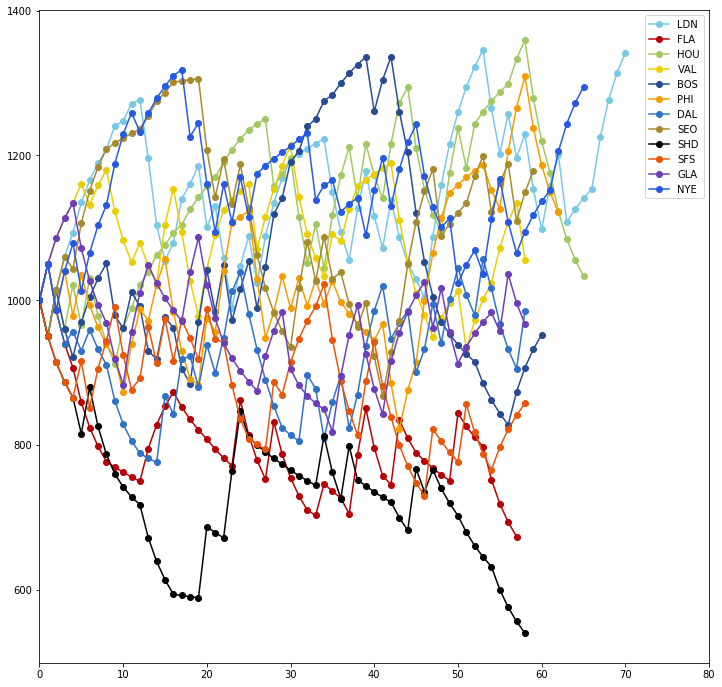

In [48]:
colors = {
    'LDN': '#78c9e5',
    'DAL': '#2f72c7',
    'SHD': '#000000',
    'SFS': '#e85609',
    'BOS': '#264b92',
    'PHI': '#f49d00',
    'SEO': '#a78a2c',
    'NYE': '#265ae1',
    'FLA': '#b50004',
    'VAL': '#eace00',
    'HOU': '#a1c861',
    'GLA': '#6d3eb9'
}
plt.figure(figsize=(12,12))
for key, value in team_elo_dfs.items():
    plt.plot(value['Match Number'], value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([0,80])
plt.legend()
plt.show()

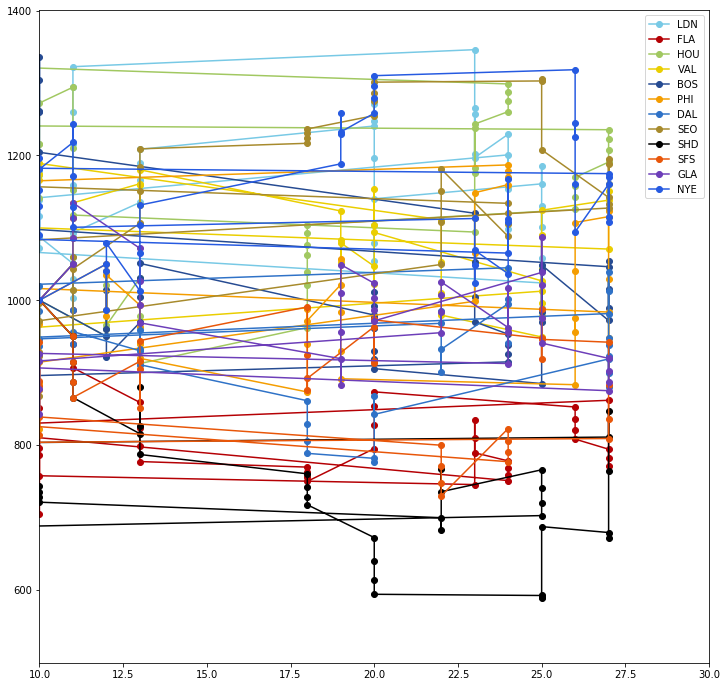

In [47]:
plt.figure(figsize=(12,12))
for key, value in team_elo_dfs.items():
    plt.plot(value['Date'].str[-2:].astype(int), value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([10,30])
plt.legend()
plt.show()

In [11]:
test_str = '2018-01-11'

In [12]:
new_str = test_str[:-2] + str(int(test_str[-2:])-1)
new_str

'2018-01-10'

In [13]:
elo_df.sort_values(by='Match Number', ascending=False).reset_index(drop=True).iloc[0]['Match Number']

70

## Try out the map-style break down.

In [14]:
KOTH_df = main_df[main_df['Map Type'] == 'KOTH']

In [15]:
KOTH_elo = et.compute_elo_table(KOTH_df, K=60)

In [16]:
team_elo_KOTH = {}
for team in team_list:
    temp_elo_df = KOTH_elo[KOTH_elo["Team"]==team]
    team_elo_KOTH[team] = temp_elo_df

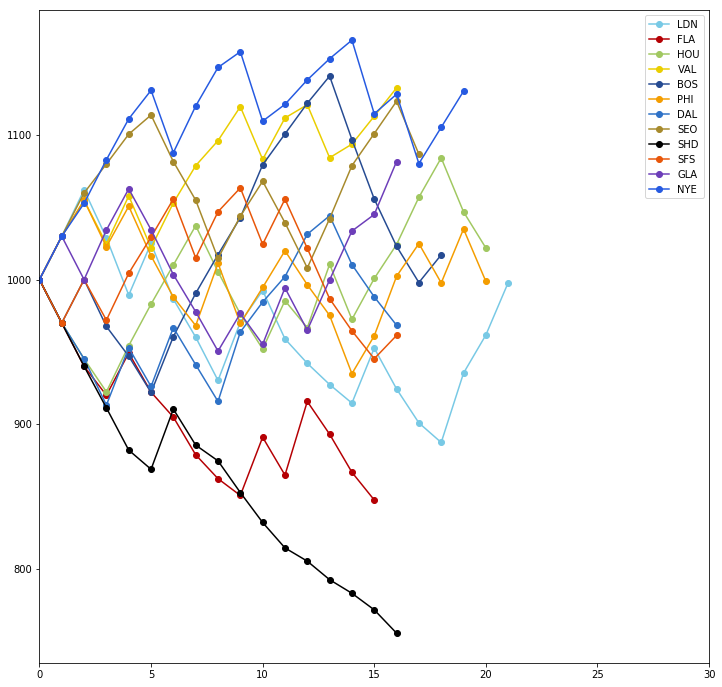

In [17]:
colors = {
    'LDN': '#78c9e5',
    'DAL': '#2f72c7',
    'SHD': '#000000',
    'SFS': '#e85609',
    'BOS': '#264b92',
    'PHI': '#f49d00',
    'SEO': '#a78a2c',
    'NYE': '#265ae1',
    'FLA': '#b50004',
    'VAL': '#eace00',
    'HOU': '#a1c861',
    'GLA': '#6d3eb9'
}
plt.figure(figsize=(12,12))
for key, value in team_elo_KOTH.items():
    plt.plot(value['Match Number'], value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([0,30])
plt.legend()
plt.show()

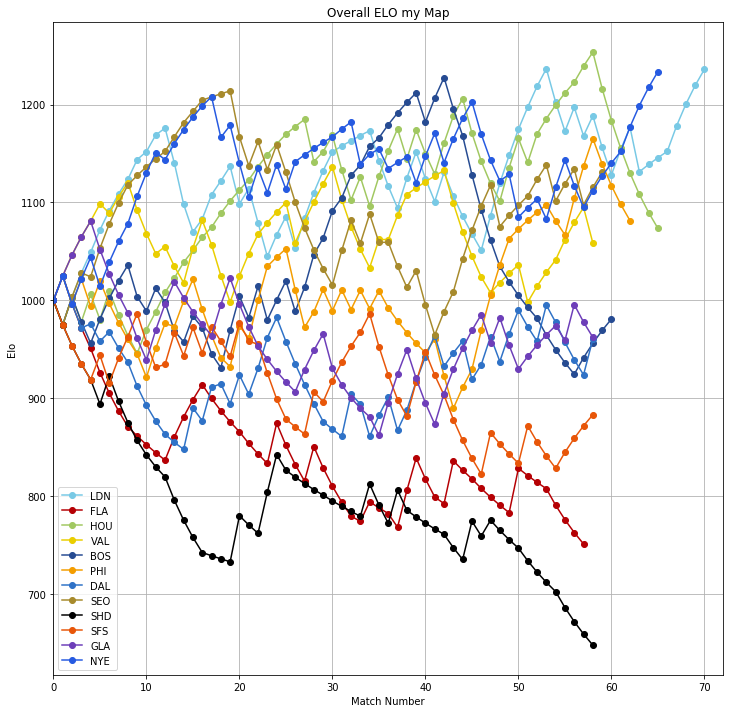

In [18]:
ev.plot_elo_by_match(elo_df, title="Overall ELO my Map")

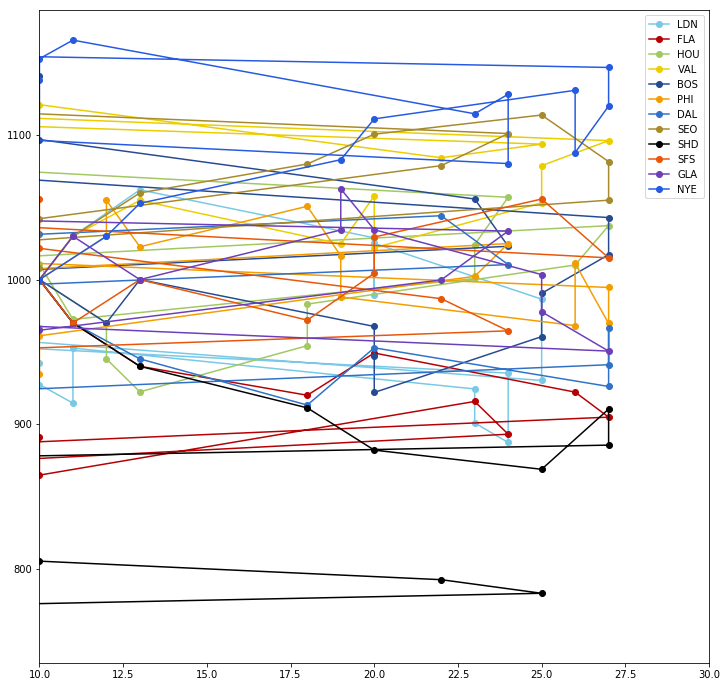

In [19]:
plt.figure(figsize=(12,12))
for key, value in team_elo_KOTH.items():
    plt.plot(value['Date'].str[-2:].astype(int), value['Elo'], label=key, marker='o', color=colors[key])
plt.xlim([10,30])
plt.legend()
plt.show()

In [20]:
import ELOVisuals as ev

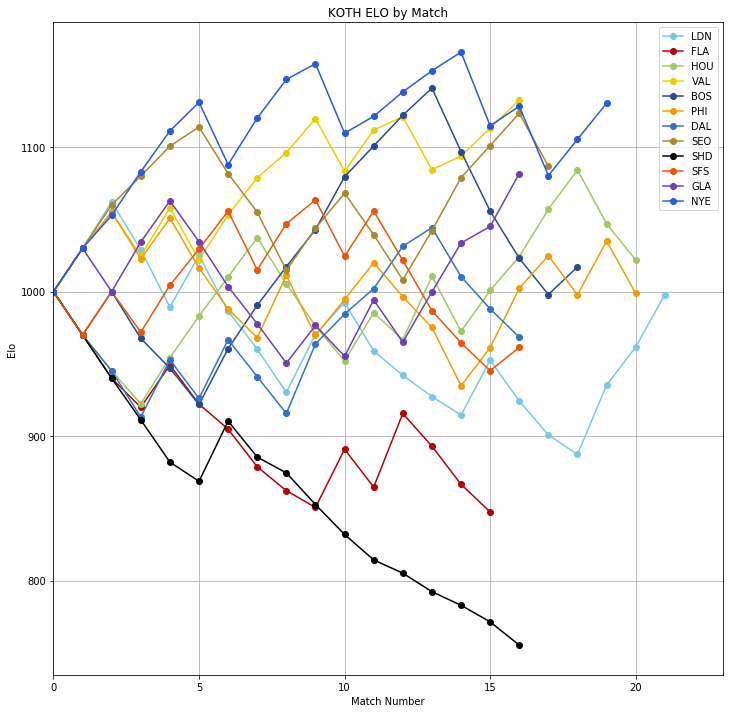

In [21]:
ev.plot_elo_by_match(KOTH_elo, title="KOTH ELO by Match")

In [22]:
for team in team_list:
    print("{}: {}".format(team, et.get_current_elo(KOTH_elo, team, "2018-02-11")))

LDN: 952.612916698682
FLA: 864.6873544938954
HOU: 972.495016306095
VAL: 1121.0560339751576
BOS: 1096.9609293251194
PHI: 961.1118322928628
DAL: 1031.398853035338
SEO: 1042.1882931429363
SHD: 805.1273154699553
SFS: 1021.6404601421367
GLA: 964.9560350493468
NYE: 1165.7649600684745


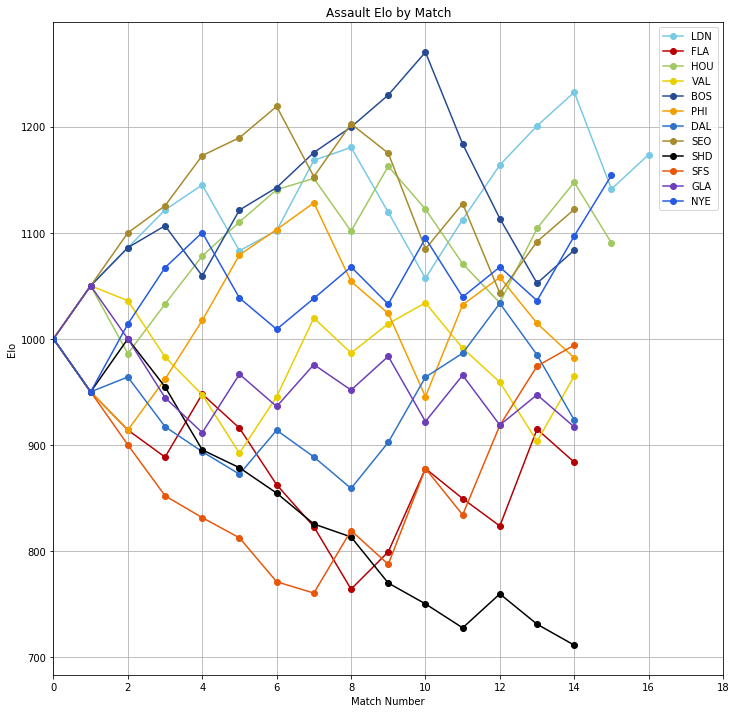

In [23]:
Assault_df = main_df[main_df['Map Type'] == 'Assault']
Assault_elo = et.compute_elo_table(Assault_df, K=100)
ev.plot_elo_by_match(Assault_elo, title="Assault Elo by Match")

In [24]:
for team in team_list:
    print("{}: {}".format(team, et.get_current_elo(Assault_elo, team, "2018-02-01")))

LDN: 1102.0548526381435
FLA: 822.866334929656
HOU: 1151.2867968792202
VAL: 1019.6453323745768
BOS: 1142.6708266107917
PHI: 1054.1456655044396
DAL: 888.654013721986
SEO: 1219.1712680502294
SHD: 854.5056936555931
SFS: 760.2722271357921
GLA: 975.7281975525401
NYE: 1008.9987909470314


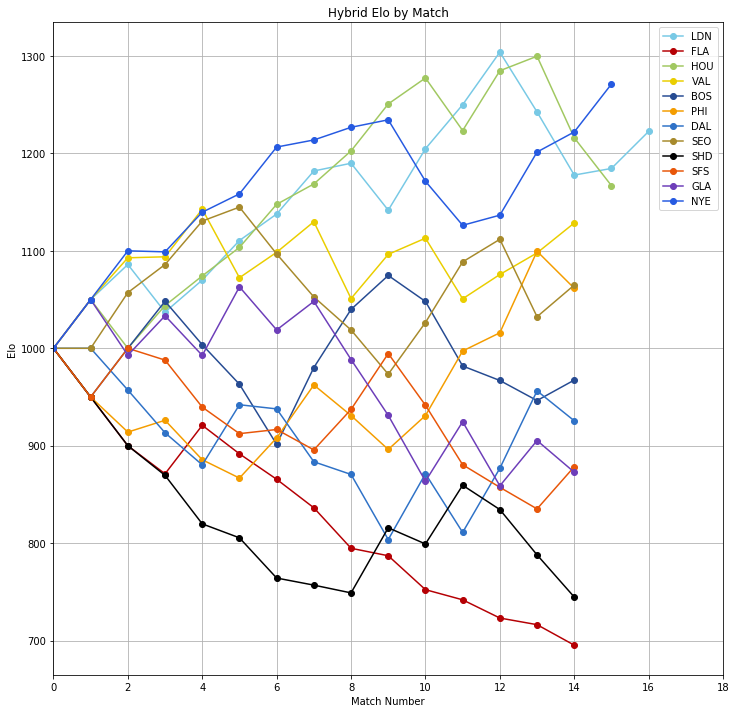

In [25]:
Assault_df = main_df[main_df['Map Type'] == 'Hybrid']
Hybrid_elo = et.compute_elo_table(Assault_df, K=100)
ev.plot_elo_by_match(Hybrid_elo, "Hybrid Elo by Match")

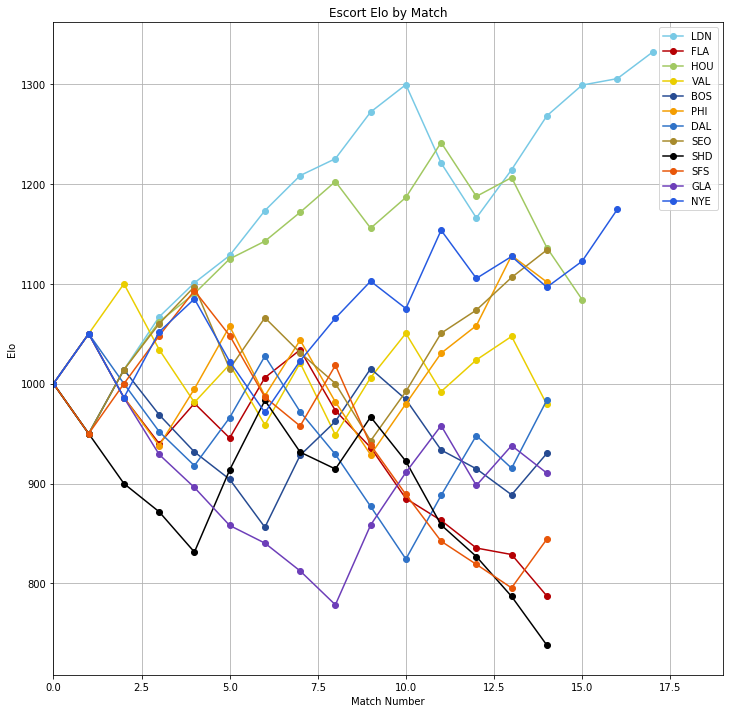

In [26]:
Assault_df = main_df[main_df['Map Type'] == 'Escort']
Escort_elo = et.compute_elo_table(Assault_df, K=100)
ev.plot_elo_by_match(Escort_elo, "Escort Elo by Match")

In [27]:
escort_elo_list = []
for team in team_list:
    escort_elo_list.append([team, et.get_current_elo(Escort_elo, team, "2018-02-10")])
current_escort_elo_df = pd.DataFrame(escort_elo_list, columns=["Team", "Elo"])
current_escort_elo_df.head()

,Team,Elo
0,LDN,1299.329948
1,FLA,885.051049
2,HOU,1186.458948
3,VAL,1050.435313
4,BOS,984.238564


In [28]:

current_escort_elo_df = current_escort_elo_df.sort_values(by="Elo",ascending=False).reset_index(drop=True)
current_escort_elo_df.head(12)

,Team,Elo
0,LDN,1299.329948
1,HOU,1186.458948
2,NYE,1075.214338
3,VAL,1050.435313
4,SEO,992.205106
5,BOS,984.238564
6,PHI,979.905600
7,SHD,922.360144
8,GLA,911.218335
9,SFS,889.138324


## Single Team Graph

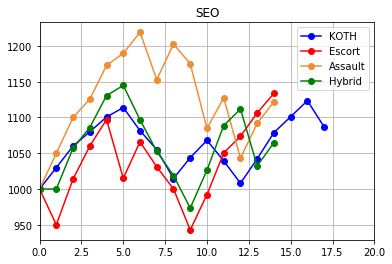

In [29]:
SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == 'SEO']
plt.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
SEO_Escort = Escort_elo[Escort_elo['Team'] == 'SEO']
plt.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
SEO_Assault = Assault_elo[Assault_elo['Team'] == 'SEO']
plt.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == 'SEO']
plt.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
plt.xlim([0,20])
plt.legend()
plt.title('SEO')
plt.grid()
plt.show()

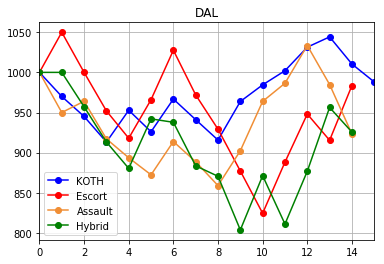

In [30]:
plot_team = "DAL"
SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == plot_team]
plt.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
SEO_Escort = Escort_elo[Escort_elo['Team'] == plot_team]
plt.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
SEO_Assault = Assault_elo[Assault_elo['Team'] == plot_team]
plt.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == plot_team]
plt.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
plt.xlim([0,15])
plt.legend()
plt.title(plot_team)
plt.grid()
plt.show()

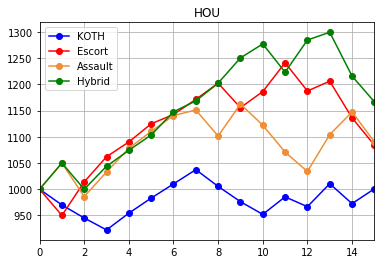

In [31]:
plot_team = "HOU"
SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == plot_team]
plt.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
SEO_Escort = Escort_elo[Escort_elo['Team'] == plot_team]
plt.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
SEO_Assault = Assault_elo[Assault_elo['Team'] == plot_team]
plt.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == plot_team]
plt.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
plt.xlim([0,15])
plt.legend()
plt.title(plot_team)
plt.grid()
plt.show()

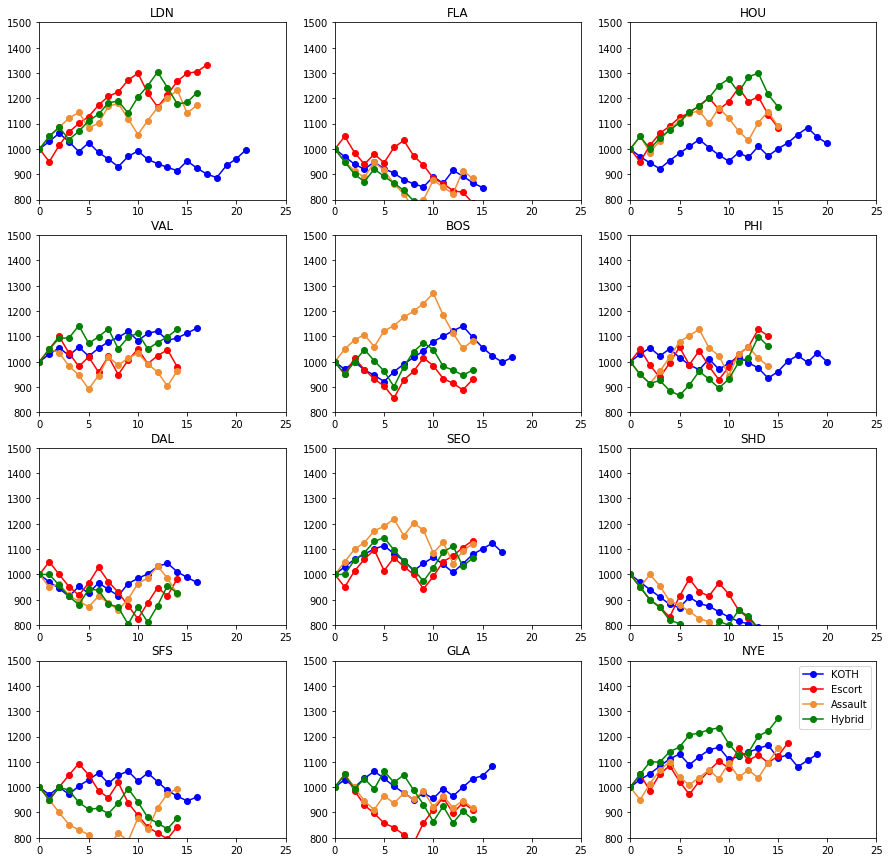

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
i=0

for plot_team in team_list:
    ax=axes[i//3,i%3 ]
    SEO_KOTH = KOTH_elo[KOTH_elo['Team'] == plot_team]
    ax.plot(SEO_KOTH['Match Number'], SEO_KOTH['Elo'], label='KOTH', marker='o', color='b')
    SEO_Escort = Escort_elo[Escort_elo['Team'] == plot_team]
    ax.plot(SEO_Escort['Match Number'], SEO_Escort['Elo'], label='Escort', marker='o', color='r')
    SEO_Assault = Assault_elo[Assault_elo['Team'] == plot_team]
    ax.plot(SEO_Assault['Match Number'], SEO_Assault['Elo'], label='Assault', marker='o', color='#f08e35')
    SEO_Hybrid = Hybrid_elo[Hybrid_elo['Team'] == plot_team]
    ax.plot(SEO_Hybrid['Match Number'], SEO_Hybrid['Elo'], label='Hybrid', marker='o', color='g')
    ax.set_xlim([0,25])
    ax.set_ylim([800, 1500])
    #ax.legend()
    ax.set_title(plot_team)
    i +=1
plt.legend()
plt.savefig('team_plots.png')
#plt.show()

## Test resampling

In [49]:
new_elo_df = et.reindex_elo_by_date(elo_df)

In [50]:
import matplotlib
from datetime import datetime

In [51]:
new_elo_df["DateTime"] = new_elo_df["Date"].apply(lambda x: matplotlib.dates.date2num(datetime.strptime(x, '%Y-%m-%d')))

In [52]:
new_team_elo_dfs = {}
for team in team_list:
    temp_elo_df = new_elo_df[new_elo_df["Team"]==team]
    new_team_elo_dfs[team] = temp_elo_df

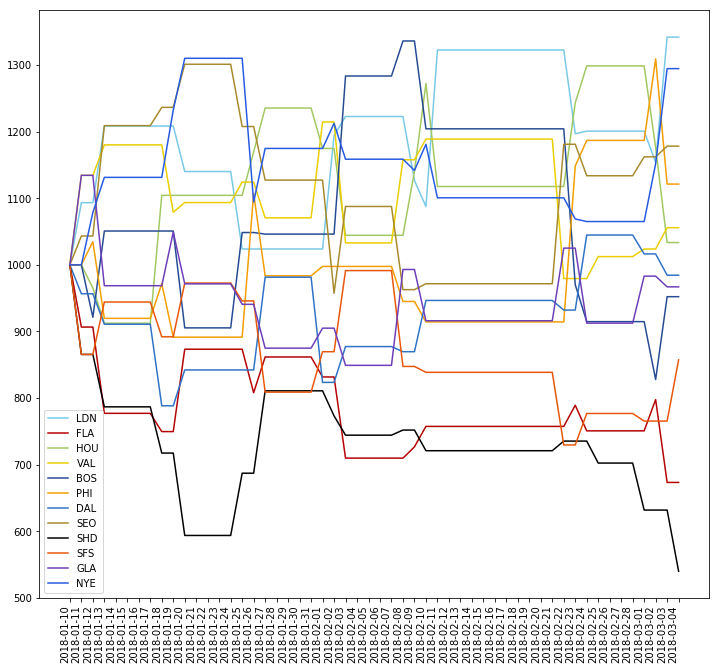

In [53]:
plt.figure(figsize=(12,12))
for key, value in new_team_elo_dfs.items():
    plt.plot(value['Date'], value['Elo'], label=key, color=colors[key])
plt.xlim()
plt.gcf().autofmt_xdate()
plt.xticks(rotation='90')
plt.legend()
plt.show()

In [38]:
new_elo_df

,Date,Elo,Match Number,Team,DateTime
0,2018-01-10,1000.000000,0,LDN,736704.0
0,2018-01-11,1049.055747,4,LDN,736705.0
0,2018-01-12,1049.055747,4,LDN,736706.0
0,2018-01-13,1123.585688,8,LDN,736707.0
0,2018-01-14,1123.585688,8,LDN,736708.0
0,2018-01-15,1123.585688,8,LDN,736709.0
0,2018-01-16,1123.585688,8,LDN,736710.0
0,2018-01-17,1123.585688,8,LDN,736711.0
0,2018-01-18,1123.585688,8,LDN,736712.0
0,2018-01-19,1123.585688,8,LDN,736713.0
